Valor inicial de velocidad =  49.05000000000601 m/s


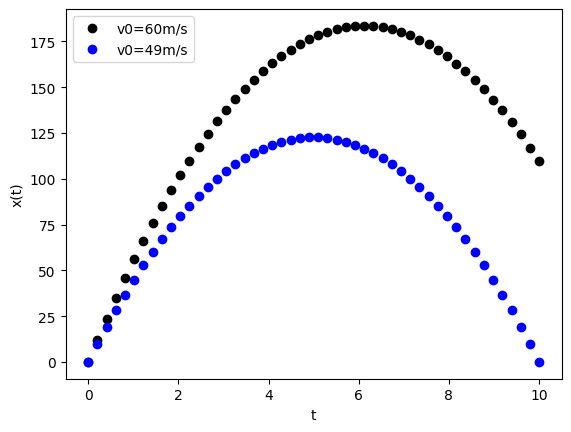

In [13]:
# Ejemplo 8.8: Posicion vertical de una bola
# Bola es lanzada por el aire en instante t = 0 y cae de nuevo al
# suelo en t = 10s
# La ecuacion diferencial que gobierna este movimiento es:
# d²x/dt² = -g

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
##### Primera parte ######
# Funcion que entrega dx/dt, dv/dt
def func(r,t):
    x = r[0]; v = r[1]
    dxdt = v; dvdt = -9.81
    return np.array([dxdt,dvdt], float)
v0 = 60 # Suposicion inicial
r0 = [0, v0] # Condicion inicial
N = 50; t = np.linspace(0, 10, N)
sol = odeint(func, r0, t)

plt.clf(); plt.plot(t, sol[:,0], 'ok')
plt.ylabel('x(t)'); plt.xlabel('t')
 ####### Segunda parte ########
v0 = np.linspace(0,100,100)
def yfnal(v0):
    sol = odeint(func, (0, v0), t)
    x = sol[:,0]
    return x[-1]

root = fsolve(yfnal,10)[0]
print("Valor inicial de velocidad = ", root, "m/s")
#### Comprobar que condicion inicial v0 = 49 es correcta
#####
sol = odeint(func, (0,root), t)
plt.plot(t, sol[:,0], 'ob')
plt.ylabel('x(t)'); plt.xlabel('t')
plt.legend(('v0=60m/s','v0=49m/s'), loc=2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

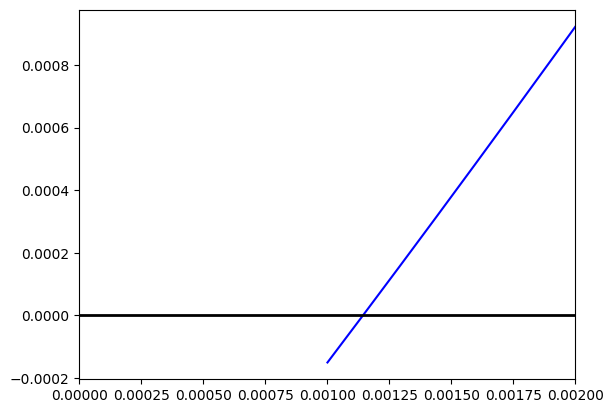

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Resuelva la siguiente ODE de 2do orden para el
# angulo theta en funcion de S -> theta(S) en el dominio
# 0 - L donde L = 600:
# d²theta/dS² = -c cos(theta)
# Tenemos las siguientes condiciones: theta(0) = 0 y dtheta/dS(600) = Kr
# Kr =0.00066937343 y c =8.360795454545*10^(-7)

def f(r,S):
  theta=r[0];z=r[1]
  dtheds=z
  c=8.360795454545*10**(-7)
  dzds=-np.cos(theta)*c
  return np.array([dtheds,dzds],float)
Kr=0.00066937343
z0=0.009 #Suposición inicial
r0=[0,z0]#condicion inicial
S=np.linspace(0, 600, 600)
sol=odeint(f,r0,S)

z0 = np.linspace(0.001,0.002,200)
def thetaf(z0):
  sol = odeint(f, (0, z0), S)
  return sol[-1,1] - Kr

tf = [ ]
for ii in z0:
  tf.append(thetaf(ii))
plt.clf(); plt.plot(z0, tf, '-b')
plt.hlines(0,0, 0.01, colors='k', lw=2); plt.xlim(0, 0.002)
# Find roots
root = fsolve(thetaf, 0.001)[0]
print("Valor inicial de dtheta/dS = ", root)
#### Comprobar que condicion inicial 'root' es correcta
#####
sol = odeint(f, [0, root], S)
plt.clf(); plt.plot(S, sol[:,1], 'ob')
plt.plot(600, Kr, 'or')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

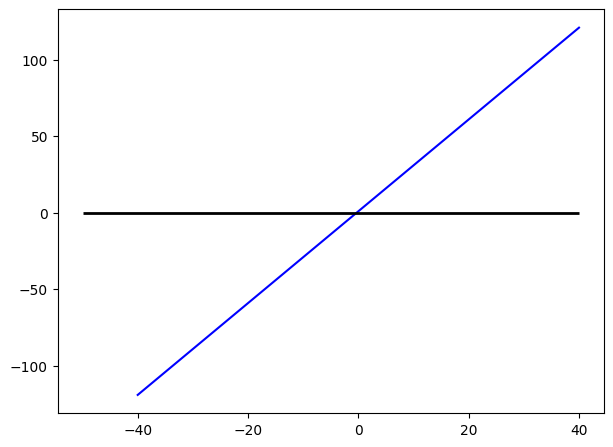

In [2]:
##################################################################
###### Ejercicio: ODE que gobierna deflección de una barra #######
##################################################################
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

##### Primera parte ######
# Función que entrega dx/dt, dv/dt
def func(r,x):
    w = 15000; E = 200*10**6; I = 30000*10**-8; L = 3
    y = r[0]
    z = r[1]
    dydx = z
    dzdx = (w*L*x/2 - w*x**2/2)/(E*I)
    return np.array([dydx, dzdx], float)

# Cond. frontera y(L) = 0
yL = 0

z0 = 40  # Suposición inicial
r0 = [0, z0]            # Condición inicial
x = np.linspace(0, 3, 50)

sol = odeint(func, r0, x)

plt.clf()
plt.subplot(2,1,1)
plt.plot(x, sol[:,0], 'ok')
plt.plot(3, yL, 'or')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x, sol[:,1], 'ok')
plt.ylabel(r'$dy/dx$')
plt.xlabel('x')
plt.tight_layout()

def yfunc(z0):
    sol = odeint(func, (0, z0), x)
    return sol[-1,0]

z0 = np.linspace(-40,40,200)

yf = []
for ii in z0:
    yf.append(yfunc(ii))

plt.clf()
plt.plot(z0, yf, '-b')
plt.hlines(0,-50, 40, colors='k', lw=2)
#plt.xlim(0, 0.002)



# Find roots
root = fsolve(yfunc, 10)[0]

print("Valor inicial de dy/dx = ", root)

#### Comprobar que condición inicial es correcta #####
sol = odeint(func, [0, root], x)

plt.clf()
plt.subplot(2,1,1)
plt.plot(x, sol[:,0], 'ok')
plt.plot(3, yL, 'or')
plt.ylabel('y(t)')

plt.subplot(2,1,2)
plt.plot(x, sol[:,1], 'ob')
plt.ylabel('dy(t)/dx')
plt.xlabel('X')
plt.legend(('dy/dx','yL'), loc=2)

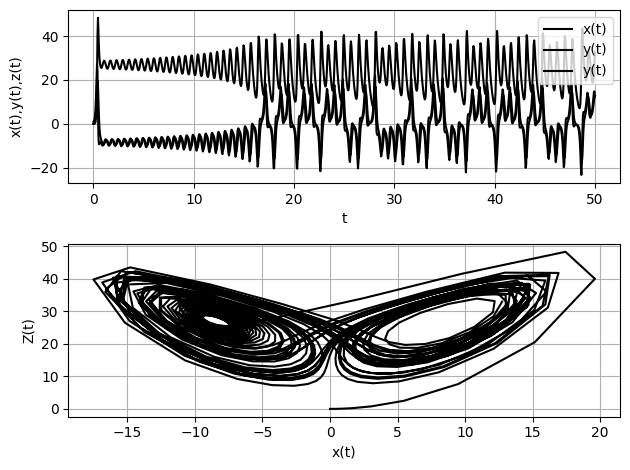

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def lor(r,t):
  x=r[0];y=r[1];z=r[2]
  sigma=10;R=28;b=8/3
  fx=sigma*(y-x);fy=R*x-y-x*z;fz=x*y-b*z
  return np.array([fx,fy,fz],float)
r0=[0,1,0];t=np.linspace(0,50,1000)
sol=odeint(lor,r0,t)
plt.clf()
plt.subplot(2,1,1)
plt.plot(t,sol[:,0],"-k",label="x(t)")
plt.plot(t,sol[:,1],"-k",label="y(t)")
plt.plot(t,sol[:,2],"-k",label="y(t)")
plt.ylabel("x(t),y(t),z(t)");plt.xlabel("t")
plt.legend(loc="best");plt.tight_layout()
plt.grid()
plt.subplot(2,1,2)
plt.plot(sol[:,0],sol[:,2],"-k")
plt.ylabel("Z(t)");plt.xlabel("x(t)")
plt.tight_layout()
plt.grid()

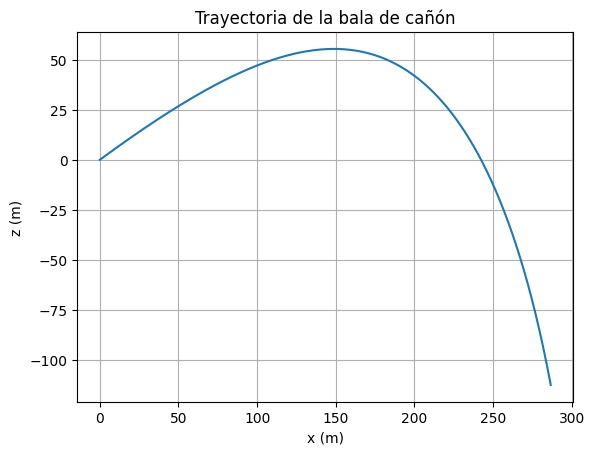

Tiempo de impacto con el suelo: 6.586586586586587 segundos
Distancia recorrida en x al llegar al suelo: 242.41384223513234 metros


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros
m = 1  # Masa de la bala de cañón en kg
R = 0.08  # Radio de la bala de cañón en metros
rho = 1.22  # Densidad del aire en kg/m^3
C = 0.47  # Coeficiente de arrastre
g = 9.81  # Aceleración de la gravedad en m/s^2
angle = np.deg2rad(30)  # Ángulo de disparo en radianes
v0 = 100  # Velocidad inicial en m/s

# Función que devuelve las derivadas de x y z con respecto al tiempo
def cannon(r, t):
    x, dxdt, z, dzdt = r
    dx2dt2 = -np.pi * R**2 * rho * C / (2 * m) * dxdt * np.sqrt(dxdt**2 + dzdt**2)
    dz2dt2 = -g - np.pi * R**2 * rho * C / (2 * m) * dzdt * np.sqrt(dxdt**2 + dzdt**2)
    return [dxdt, dx2dt2, dzdt, dz2dt2]

# Condiciones iniciales
x0 = 0
z0 = 0
vx0 = v0 * np.cos(angle)
vz0 = v0 * np.sin(angle)
r0 = [x0, vx0, z0, vz0]

# Tiempo de integración
t = np.linspace(0, 10, 1000)

# Resolver las ecuaciones diferenciales
sol = odeint(cannon, r0, t)

# Extraer las trayectorias x y z
x = sol[:, 0]
z = sol[:, 2]

# Graficar la trayectoria
plt.plot(x, z)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Trayectoria de la bala de cañón')
plt.grid()
plt.show()

# Encontrar el tiempo de impacto con el suelo
index = np.where(z < 0)[0][0]
tiempo_impacto = t[index]

# Encontrar la distancia recorrida en x al llegar al suelo
distancia_recorrida = x[index]

print("Tiempo de impacto con el suelo:", tiempo_impacto, "segundos")
print("Distancia recorrida en x al llegar al suelo:", distancia_recorrida, "metros")


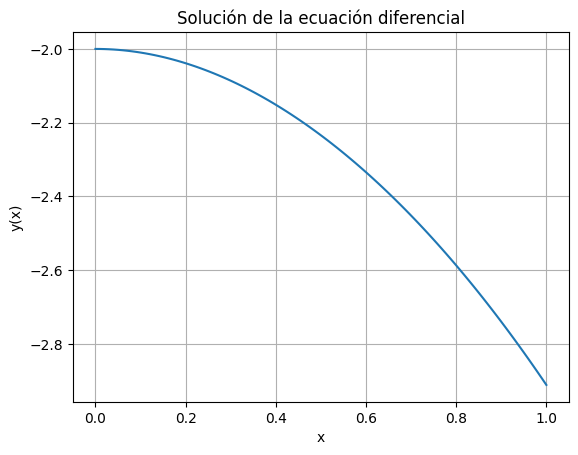

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def f(r,x):
  y=r[0];z=r[1]
  dydx=z;dzdx=y+x
  return np.array([dydx,dzdx],float)
r0=[-2,0]
x=np.linspace(0,1,100)
sol=odeint(f,r0,x)
y = sol[:, 0]

# Graficar la solución y(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución de la ecuación diferencial')
plt.grid(True)
plt.show()
